In [1]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 평가를 위한 라이브러리
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import seaborn as sns  # 시각화 라이브러리

In [2]:
train = pd.read_csv('data/train.csv', index_col = 'day_text')
test = pd.read_csv('data/test.csv', index_col = 'day_text')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 4.7 to 7.7
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team_text    7000 non-null   object 
 1   H_text       7000 non-null   int64  
 2   HR_text      7000 non-null   int64  
 3   S_text       7000 non-null   int64  
 4   ST_text      7000 non-null   int64  
 5   DU_text      7000 non-null   int64  
 6   ER_text      7000 non-null   int64  
 7   result_text  7000 non-null   int64  
 8   location     7000 non-null   object 
 9   temp         7000 non-null   float64
 10  rain         7000 non-null   float64
 11  humidity     7000 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 710.9+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3398 entries, 7.7 to 10.26토
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team_text    3398 non-null   object 
 1   H_text       3398 non-null   int64  
 2   HR_text      3398 non-null   int64  
 3   S_text       3398 non-null   int64  
 4   ST_text      3398 non-null   int64  
 5   DU_text      3398 non-null   int64  
 6   ER_text      3398 non-null   int64  
 7   result_text  3398 non-null   int64  
 8   location     3398 non-null   object 
 9   temp         3398 non-null   float64
 10  rain         3398 non-null   float64
 11  humidity     3398 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 345.1+ KB


In [5]:
train.corr()

,H_text,HR_text,S_text,ST_text,DU_text,ER_text,result_text,temp,rain,humidity
H_text,1.000000,0.381357,0.109626,-0.107799,0.080418,-0.002447,0.411615,0.067297,0.002754,0.006877
HR_text,0.381357,1.000000,-0.020410,0.009257,-0.045893,-0.019503,0.267704,0.050888,-0.024830,0.052948
S_text,0.109626,-0.020410,1.000000,0.024302,-0.070301,-0.023027,0.168250,-0.003281,-0.000741,-0.037783
ST_text,-0.107799,0.009257,0.024302,1.000000,-0.174138,0.042208,-0.177470,-0.068097,0.001156,0.051873
DU_text,0.080418,-0.045893,-0.070301,-0.174138,1.000000,0.014275,-0.079218,-0.003311,-0.005420,0.006083
ER_text,-0.002447,-0.019503,-0.023027,0.042208,0.014275,1.000000,-0.172610,-0.034883,-0.012892,-0.031010
result_text,0.411615,0.267704,0.168250,-0.177470,-0.079218,-0.172610,1.000000,0.000000,0.000000,0.000000
temp,0.067297,0.050888,-0.003281,-0.068097,-0.003311,-0.034883,0.000000,1.000000,-0.006105,-0.180981
rain,0.002754,-0.024830,-0.000741,0.001156,-0.005420,-0.012892,0.000000,-0.006105,1.000000,0.012211
humidity,0.006877,0.052948,-0.037783,0.051873,0.006083,-0.031010,0.000000,-0.180981,0.012211,1.000000


### 데이터 탐색(result_text 의 빈도가 높은 경우를 찾기)

In [27]:
test_result = test[['team_text', 'result_text', 'location']].groupby(['team_text','result_text']).count()
test_result

location
team_text result_text          
KIA 타이거즈  0                 176
          1                 163
LG 트윈스    0                 168
          1                 173
NC 다이노스   0                 186
          1                 157
SK 와이번스   0                 153
          1                 186
kt wiz    0                 185
          1                 147
두산 베어스    0                 127
          1                 222
롯데 자이언츠   0                 177
          1                 157
삼성 라이온즈   0                 181
          1                 147
키움 히어로즈   0                 163
          1                 190
한화 이글스    0                 183
          1                 157

### 온도 5도 기준으로 나눠서 시각화
- 어느 온도에서 야구 경기가 많이 이루어졌는지 볼 수 있음

In [28]:
bins = [5,11,16,21,26,31,36,41]  # 구간 만들기
labels = ['5~10', '10~15', '15~20', '20~25', '25~30', '30~35', '35~40']
train['temp'] = pd.cut(train['temp'], bins = bins, labels = labels)
test['temp'] = pd.cut(test['temp'], bins = bins, labels = labels)

<AxesSubplot:xlabel='temp', ylabel='count'>

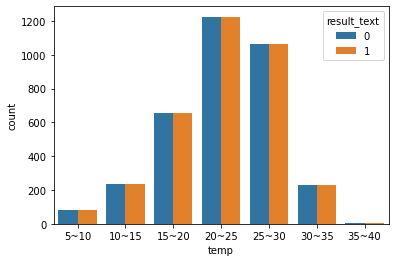

In [29]:
sns.countplot(data = train, x = 'temp', hue='result_text')

### 강수량 3mm 를 기준으로 나눠서 시각화

In [30]:
bins = [0,4,7,10,13,16,19]  # 구간 만들기
labels = ['0~3', '3~6', '6~9', '9~12', '12~15', '15~18']
train['rain'] = pd.cut(train['rain'], bins = bins, labels = labels)
test['rain'] = pd.cut(test['rain'], bins = bins, labels = labels)

<AxesSubplot:xlabel='rain', ylabel='count'>

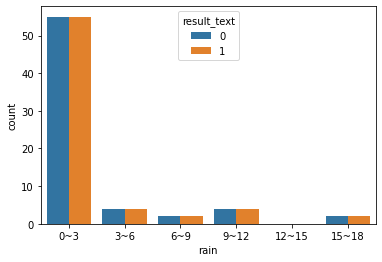

In [37]:
sns.countplot(data = train, x = 'rain', hue='result_text')

### 습도 10% 를 기준으로 나눠서 시각화

In [34]:
bins = [0,11,21,31,41,51,61,71,81,91,101]  # 구간 만들기
labels = ['0~10', '10~20', '20~30', '30~40', '40~50', '50~60', '60~70', '70~80', '80~90', '90~100']
train['humidity'] = pd.cut(train['humidity'], bins = bins, labels = labels)
test['humidity'] = pd.cut(test['humidity'], bins = bins, labels = labels)

<AxesSubplot:xlabel='humidity', ylabel='count'>

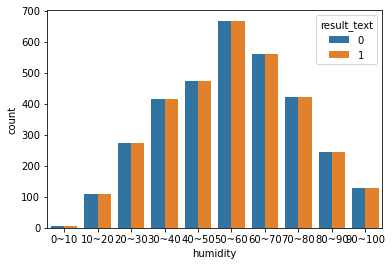

In [38]:
sns.countplot(data = train, x = 'humidity', hue='result_text')

### 팀 명 원핫 인코딩

In [6]:
train.drop('location', axis = 1 , inplace = True)
test.drop('location', axis = 1 , inplace = True)

In [7]:
y_train = train['result_text']
X_train = train.drop('result_text', axis = 1)
y_test = test['result_text']
X_test = test.drop('result_text', axis = 1)

In [8]:
cat_feature = ['team_text']

In [9]:
for i in cat_feature:
    dummy = pd.get_dummies(train[i], prefix = i)
    X_train = pd.concat([X_train, dummy], axis = 1)
    X_train.drop(i, axis=1, inplace = True)

In [10]:
for i in cat_feature:
    dummy = pd.get_dummies(test[i], prefix = i)
    X_test = pd.concat([X_test, dummy], axis = 1)
    X_test.drop(i, axis=1, inplace = True)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 4.7 to 7.7
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   H_text              7000 non-null   int64  
 1   HR_text             7000 non-null   int64  
 2   S_text              7000 non-null   int64  
 3   ST_text             7000 non-null   int64  
 4   DU_text             7000 non-null   int64  
 5   ER_text             7000 non-null   int64  
 6   temp                7000 non-null   float64
 7   rain                7000 non-null   float64
 8   humidity            7000 non-null   float64
 9   team_text_KIA 타이거즈  7000 non-null   uint8  
 10  team_text_LG 트윈스    7000 non-null   uint8  
 11  team_text_NC 다이노스   7000 non-null   uint8  
 12  team_text_SK 와이번스   7000 non-null   uint8  
 13  team_text_kt wiz    7000 non-null   uint8  
 14  team_text_두산 베어스    7000 non-null   uint8  
 15  team_text_롯데 자이언츠   7000 non-null   uint8  
 16  team_text_

In [12]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3398 entries, 7.7 to 10.26토
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   H_text              3398 non-null   int64  
 1   HR_text             3398 non-null   int64  
 2   S_text              3398 non-null   int64  
 3   ST_text             3398 non-null   int64  
 4   DU_text             3398 non-null   int64  
 5   ER_text             3398 non-null   int64  
 6   temp                3398 non-null   float64
 7   rain                3398 non-null   float64
 8   humidity            3398 non-null   int64  
 9   team_text_KIA 타이거즈  3398 non-null   uint8  
 10  team_text_LG 트윈스    3398 non-null   uint8  
 11  team_text_NC 다이노스   3398 non-null   uint8  
 12  team_text_SK 와이번스   3398 non-null   uint8  
 13  team_text_kt wiz    3398 non-null   uint8  
 14  team_text_두산 베어스    3398 non-null   uint8  
 15  team_text_롯데 자이언츠   3398 non-null   uint8  
 16  team_te

In [13]:
set(X_train.columns) - set(X_test.columns)

set()

### KNN 모델

In [14]:
knn_model = KNeighborsClassifier(n_neighbors = 50)
result = cross_val_score(knn_model,
                        X_train,
                        y_train,
                        cv = 5)
result

array([0.67      , 0.69571429, 0.68928571, 0.69642857, 0.68071429])

In [15]:
result.mean()

0.6864285714285713

#### KNN Scaler 적용

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X_train)  # 평균과 표준편차로 scaling 한 값을 컴퓨터가 기억

StandardScaler()

In [18]:
transform_X_train = scaler.transform(X_train)
transform_X_train

array([[ 0.39440379, -0.86226809,  1.10850335, ..., -0.34692725,
        -0.34821804,  2.90851499],
       [ 0.12547465,  0.09186985,  1.10850335, ..., -0.34692725,
        -0.34821804, -0.34381807],
       [-0.95024191, -0.86226809,  1.10850335, ..., -0.34692725,
        -0.34821804, -0.34381807],
       ...,
       [-0.41238363, -0.86226809, -0.784987  , ..., -0.34692725,
        -0.34821804, -0.34381807],
       [ 0.39440379,  2.9542837 , -0.784987  , ..., -0.34692725,
        -0.34821804, -0.34381807],
       [-0.14345449,  0.09186985, -0.784987  , ..., -0.34692725,
        -0.34821804, -0.34381807]])

In [19]:
transform_X_test = scaler.transform(X_test)
transform_X_test

array([[ 1.20119121,  2.00014575, -0.784987  , ..., -0.34692725,
         2.87176387, -0.34381807],
       [ 0.12547465, -0.86226809, -0.784987  , ...,  2.88244872,
        -0.34821804, -0.34381807],
       [ 0.39440379,  0.09186985,  0.16175818, ..., -0.34692725,
        -0.34821804,  2.90851499],
       ...,
       [-1.48810019, -0.86226809, -0.784987  , ..., -0.34692725,
         2.87176387, -0.34381807],
       [ 1.20119121, -0.86226809,  0.16175818, ..., -0.34692725,
        -0.34821804, -0.34381807],
       [ 0.66333293, -0.86226809, -0.784987  , ..., -0.34692725,
         2.87176387, -0.34381807]])

In [20]:
result = cross_val_score(knn_model,
                        transform_X_train,
                        y_train,
                        cv = 5)
result

array([0.68571429, 0.70642857, 0.70714286, 0.69571429, 0.69857143])

In [21]:
result.mean()

0.6987142857142856

In [22]:
y_pred = knn_model.fit(transform_X_train, y_train).predict(transform_X_test)

In [23]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (transform_X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 979


In [24]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.71


### Decision Tree 모델

In [25]:
tree_model = DecisionTreeClassifier(max_depth = 7)

In [26]:
result = cross_val_score(tree_model,
                        X_train,
                        y_train,
                        cv = 10)
result

array([0.68428571, 0.67571429, 0.67714286, 0.65      , 0.66857143,
       0.70142857, 0.68571429, 0.67285714, 0.66857143, 0.71571429])

In [27]:
result.mean()

0.68

In [28]:
y_pred = tree_model.fit(X_train, y_train).predict(X_test)

In [29]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 1020


In [30]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.70


### Naive Bayes 분류 모델

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
nb = GaussianNB()

In [33]:
y_pred = nb.fit(X_train, y_train).predict(X_test)

In [34]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 1072


In [35]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.68


### SVM 분류 모델

In [36]:
svm_model = SVC(kernel='rbf', C=300, gamma=0.0001)

In [37]:
y_pred = svm_model.fit(X_train, y_train).predict(X_test)

In [38]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 958


In [39]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.72
